## **线性回归预测房价**
- - -
##### **任务**:
##### 基于usa_housing_price.csv数据,建立线性回归模型,预测合理房价:
- 以面积为输入变量,建立单因子模型,评估模型表现可视化线性回归预测结果
- 以收入,房屋年限,房间数,区域人口,房屋面积为输入变量,建立多因子模型,评估模型表现
- 预测收入=65000,年限=5,房间数=5,区域人口=30000,面积=200时的合理房价

In [3]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
data.head()

,收入,房屋年限,房间数,区域人口,房屋面积,价格
0,52845.6,5.2,7.0,23086.0,158.8,158725
1,40881.2,7.5,6.0,40173.0,118.9,118945
2,42324.3,6.1,6.0,36882.0,138.4,138473
3,56106.9,4.3,8.0,26354.0,178.4,178380
4,35401.3,8.9,5.0,34310.0,105.0,105078


数据总量: 300


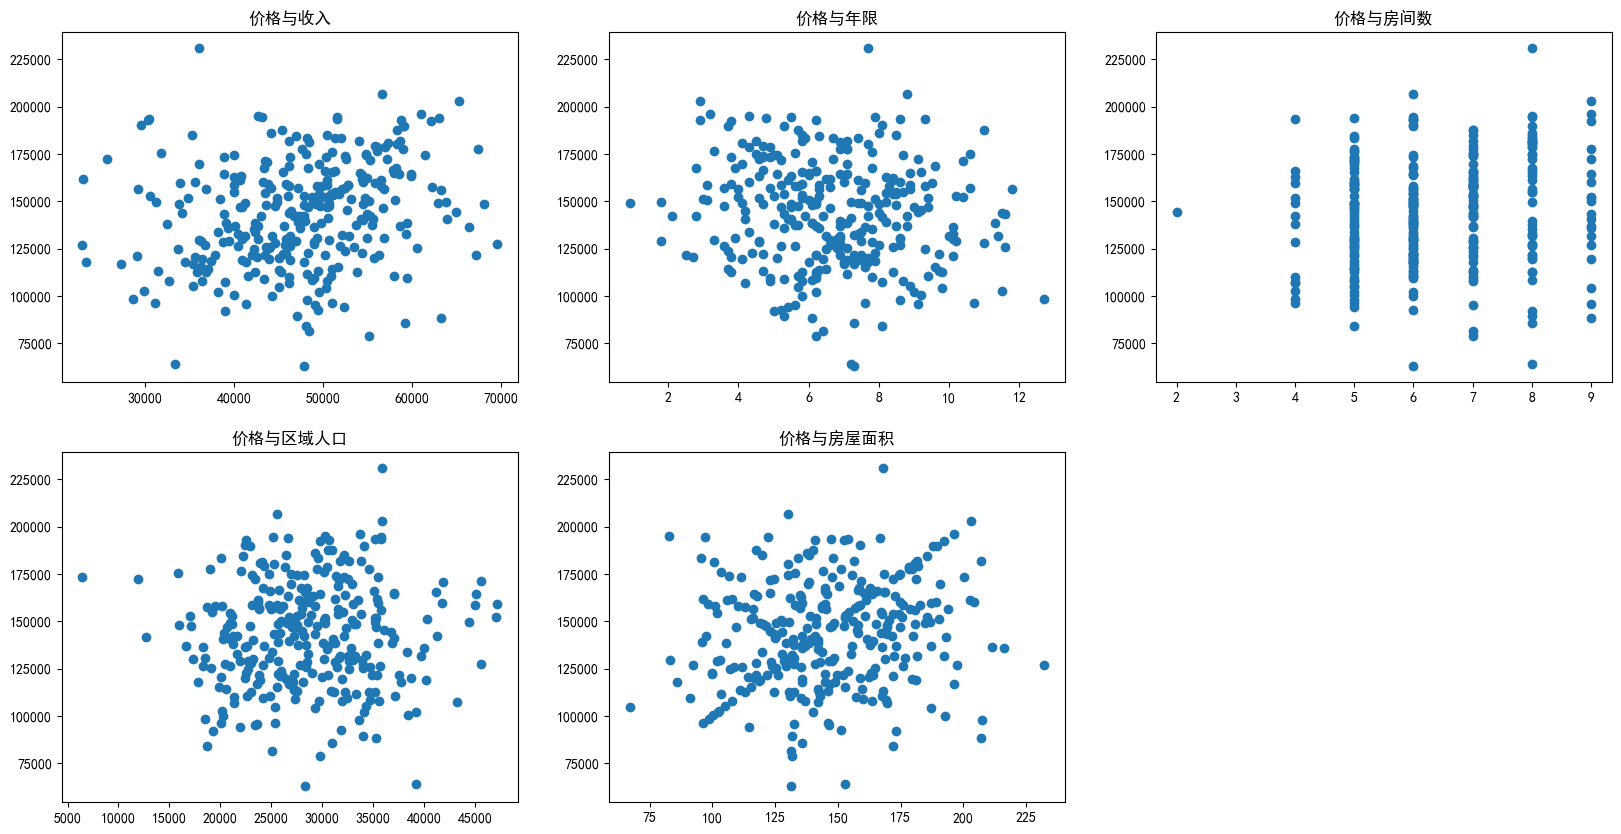

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']  # Windows：SimHei；macOS：PingFang SC
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示异常问题
print(f"数据总量: {len(data)}")  # 确认是否为300

fig = plt.figure(figsize=(20,10))

fig1 = plt.subplot(231)
plt.scatter(data.loc[:,'收入'],data.loc[:,'价格'])
plt.title('价格与收入')

fig2 = plt.subplot(232) 
plt.scatter(data.loc[:,'房屋年限'],data.loc[:,'价格'])
plt.title('价格与年限')

fig3 = plt.subplot(233) 
plt.scatter(data.loc[:,'房间数'],data.loc[:,'价格'])
plt.title('价格与房间数')

fig4 = plt.subplot(234) 
plt.scatter(data.loc[:,'区域人口'],data.loc[:,'价格'])
plt.title('价格与区域人口')

fig5 = plt.subplot(235) 
plt.scatter(data.loc[:,'房屋面积'],data.loc[:,'价格'])
plt.title('价格与房屋面积')

plt.show()

In [9]:
#define X and Y
x = data.loc[:,'房屋面积']
y = data.loc[:,'价格']
y.head()

0    158725
1    118945
2    138473
3    178380
4    105078
Name: 价格, dtype: int64

In [11]:
x = np.array(x).reshape(-1,1)

In [12]:
#set up the linear regression model
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
#train the model
LR1.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
#calculate the prine vs size
y_predict_1 = LR1.predict(x)

In [21]:
#evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error_1 = mean_squared_error(y,y_predict_1)
r2_score_1 = r2_score(y,y_predict_1)
print(mean_squared_error_1,r2_score_1)

758458252.7113656 0.025781705026122093


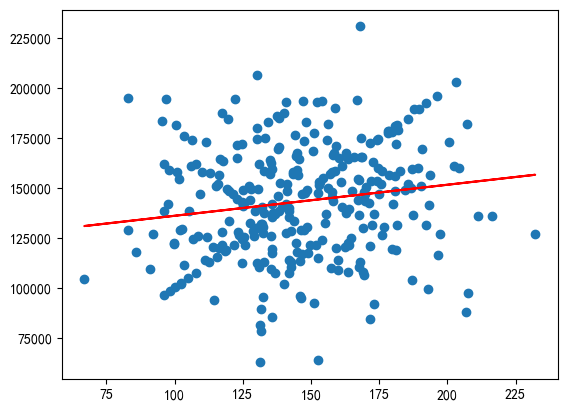

In [15]:
fig6 = plt.figure()
plt.scatter(x,y)
plt.plot(x,y_predict_1,'r')
plt.show()

In [16]:
#define X_multi
x_multi = data.drop(['价格'],axis=1)

In [17]:
#set up second linear model
LR_multi = LinearRegression()
#train the model
LR_multi.fit(x_multi,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
#make prediction
y_predict_multi = LR_multi.predict(x_multi)

In [22]:
mean_squared_error_multi = mean_squared_error(y,y_predict_multi)
r2_score_multi = r2_score(y,y_predict_multi)
print(mean_squared_error_multi,r2_score_multi)

719592174.0357885 0.07570409002791134


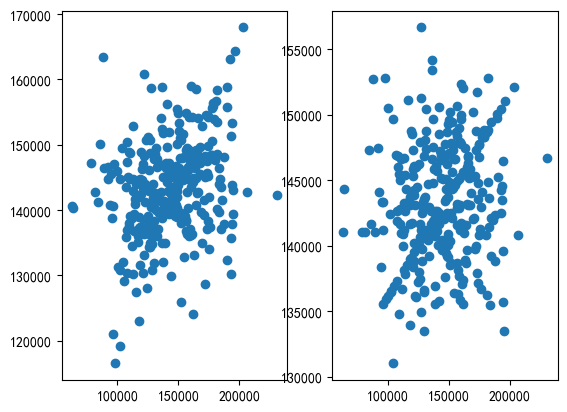

In [26]:
fig7 = plt.subplot(121)
plt.scatter(y,y_predict_multi)
fig8 = plt.subplot(122)
plt.scatter(y,y_predict_1)
plt.show()
#由此可见多因子模型下预测结果(y_predict_multi)要更接近实际情况(y)

In [27]:
x_test = [65000,5,5,30000,200]
x_test = np.array(x_test).reshape(1,-1)

In [28]:
y_test_predict = LR_multi.predict(x_test)
print(y_test_predict)

[158340.19391929]


D:\Study\Anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 线性回归房价实战
1. 通过搭建线性回归模型,实现单因子的房屋价格预测
2. 在单因子模型效果不好的情况下,通过考虑更多的因子,建立了多因子模型:
3. 多因子模型达到了更好的预测结果,r2分数更高了
4. 实现了预测结果的可视化,直观对比预测价格和实际价格的差异